# Diamond Price Prediction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle Datasets Analysis/2. Dimond Price Prediction/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

## Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


dropping Unnamed: 0 column because its unuseful

In [7]:
# dropping Unnamed: 0 column because its unuseful
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


removing where x,y and z is equal to 0 because its outliers in dataset

In [8]:
# removing where x,y and z is equal to 0
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

## Pairplot of the data - Outliers Detection

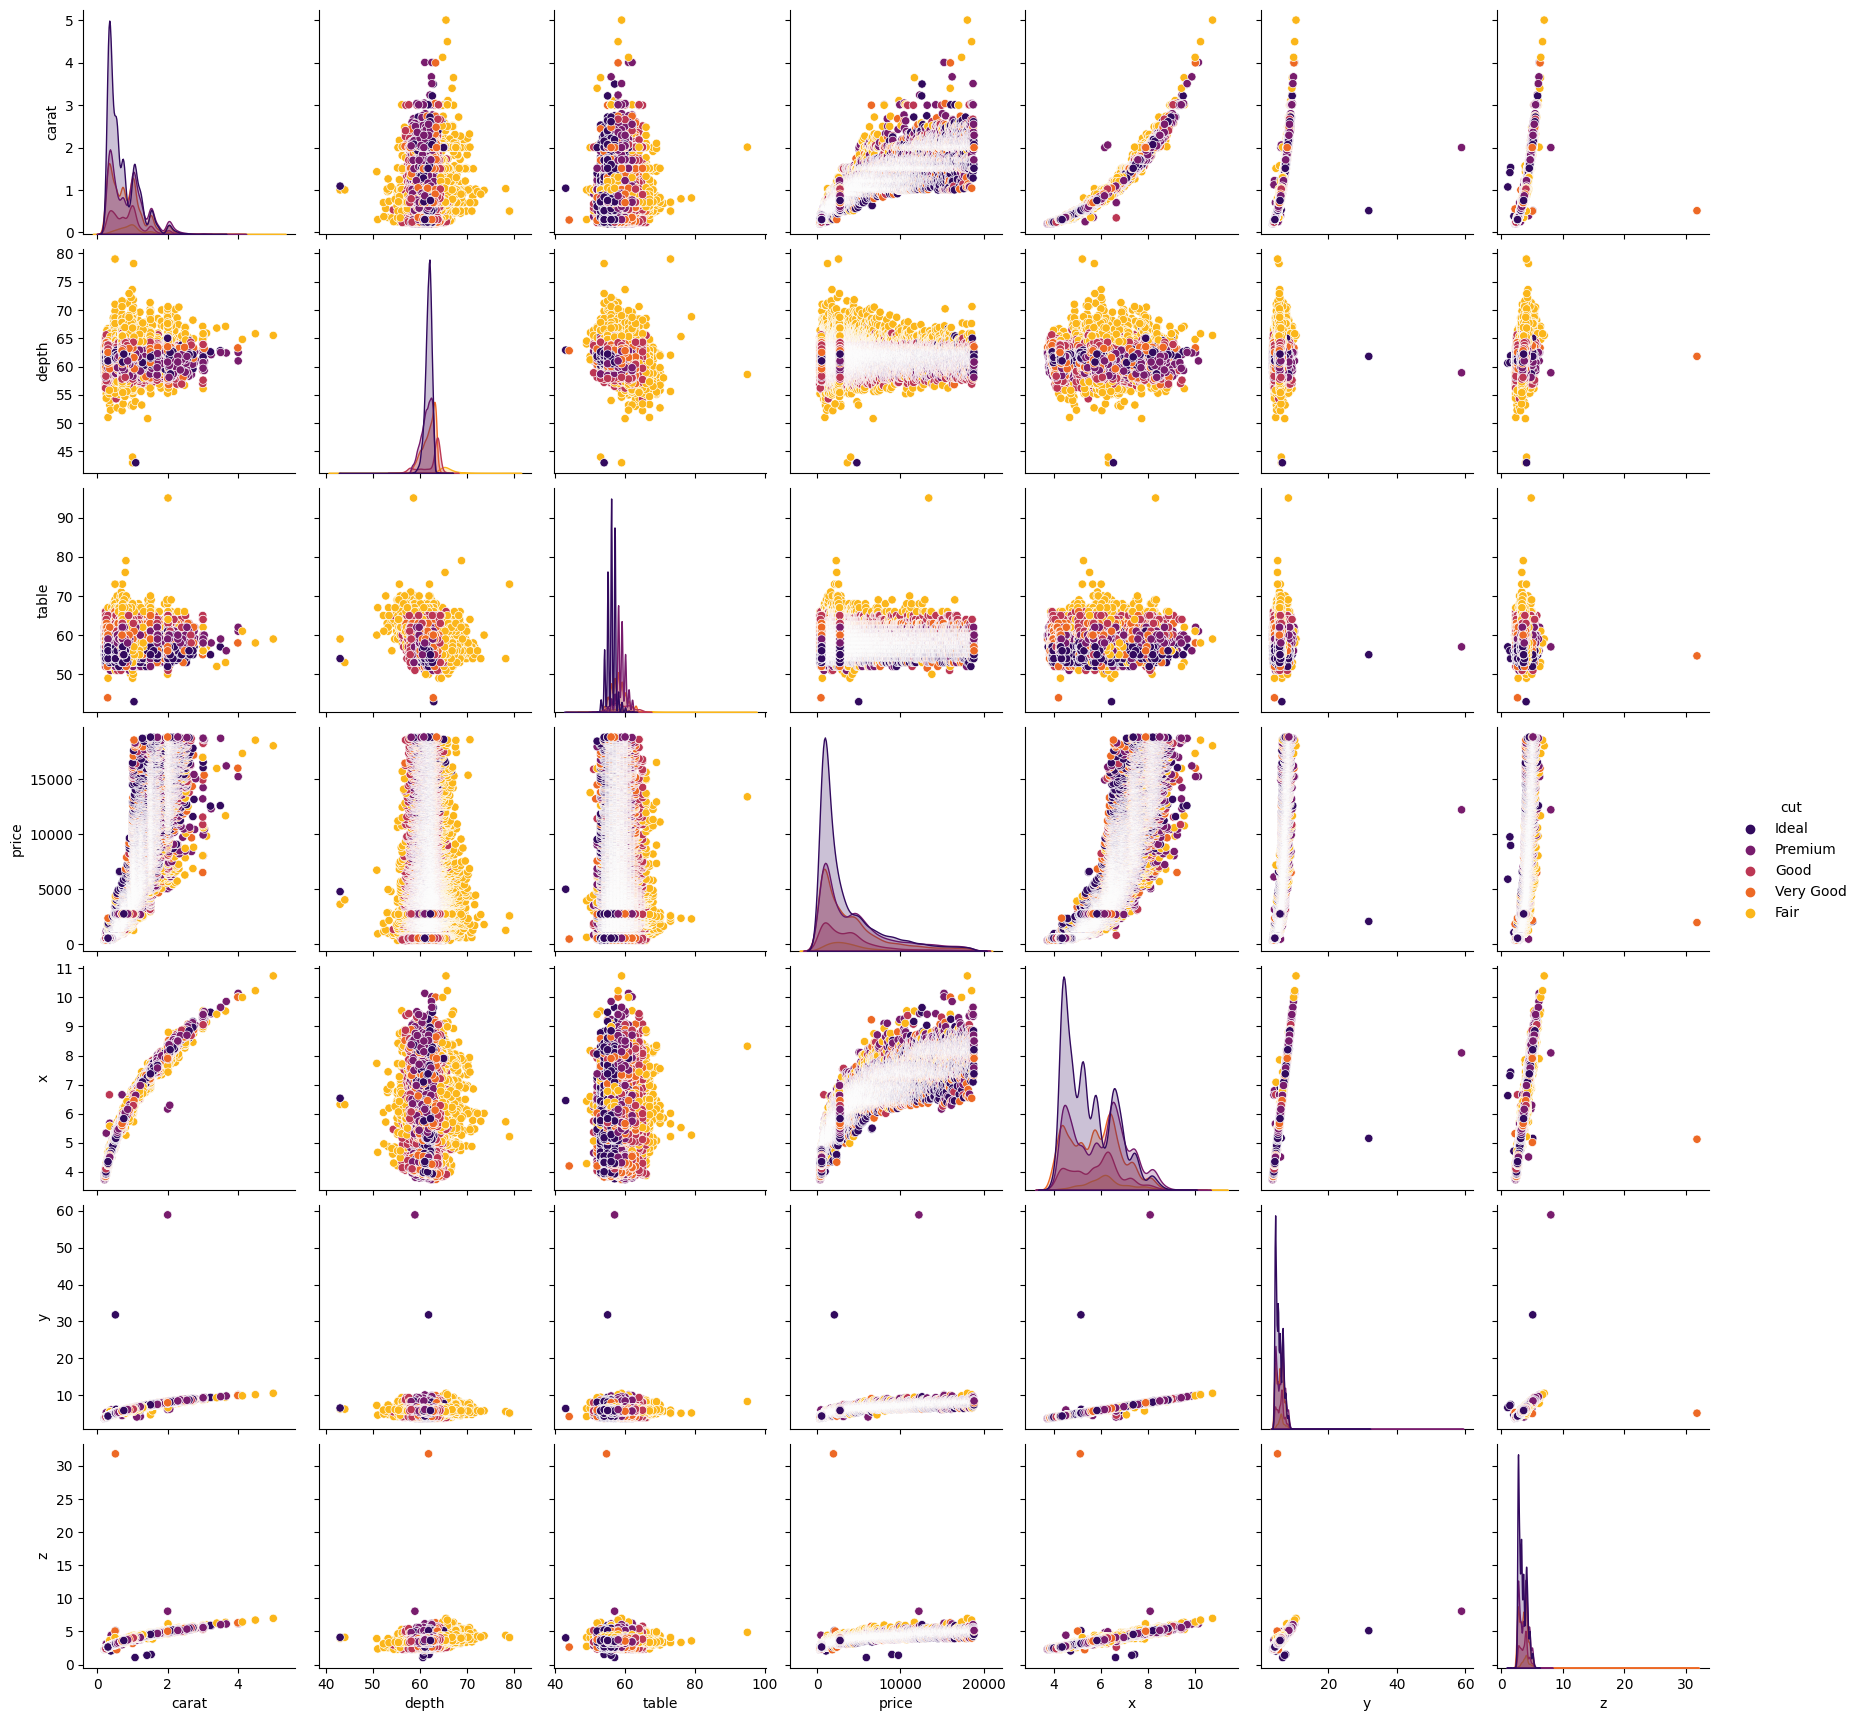

In [9]:
ax = sns.pairplot(df, hue= "cut",palette='inferno')

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

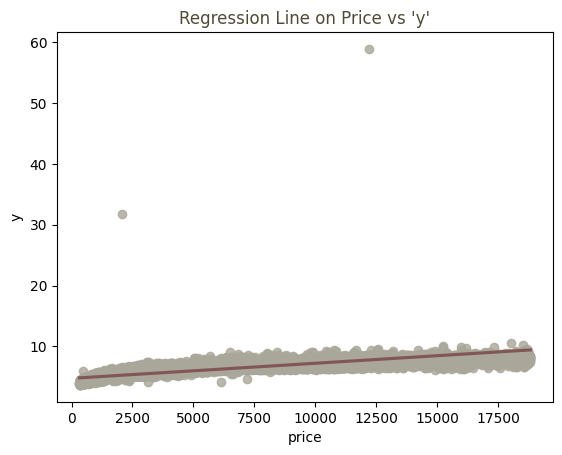

In [10]:
# Price vs y
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

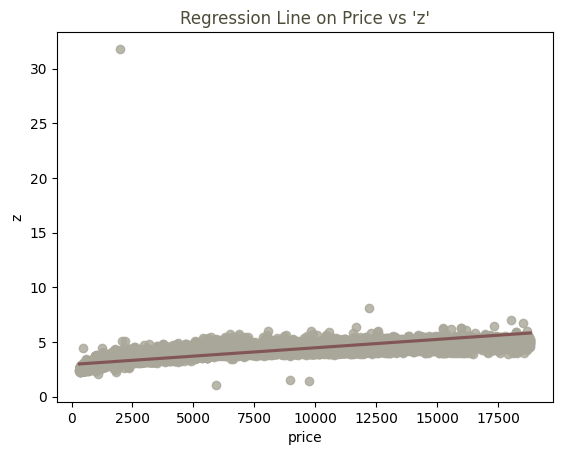

In [11]:
# Price vs z
ax = sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'deoh'")

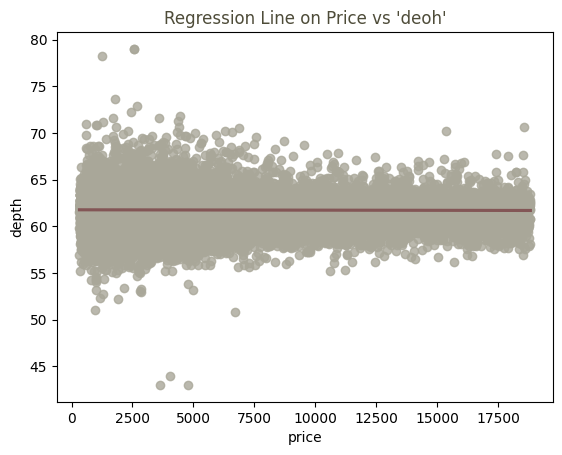

In [12]:
# Price vs depth
ax=sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'deoh'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'table'")

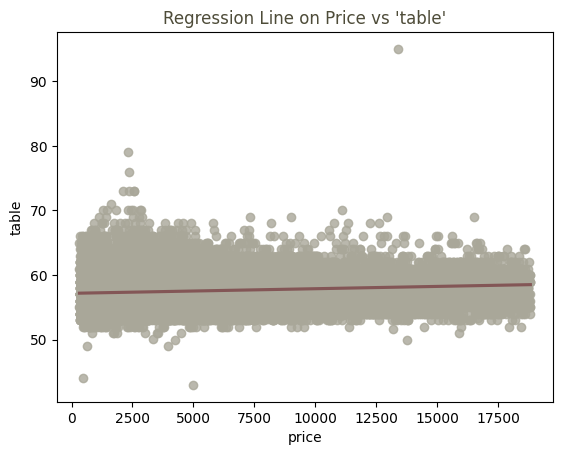

In [13]:
# Price vs y
ax = sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'table'", color="#4e4c39")

## Dropping the outliers

In [14]:
#Dropping the outliers from the columns
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

In [15]:
ax = sns.pairplot(df, hue= "cut",palette='inferno')

Output hidden; open in https://colab.research.google.com to view.

## Dealing with categorical variables

In [16]:
# get list of the categorical variables
cat = (df.dtypes=="object")
object_cols = list(cat[cat].index)
print("Categorical Variabes: ")
print(object_cols)

Categorical Variabes: 
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

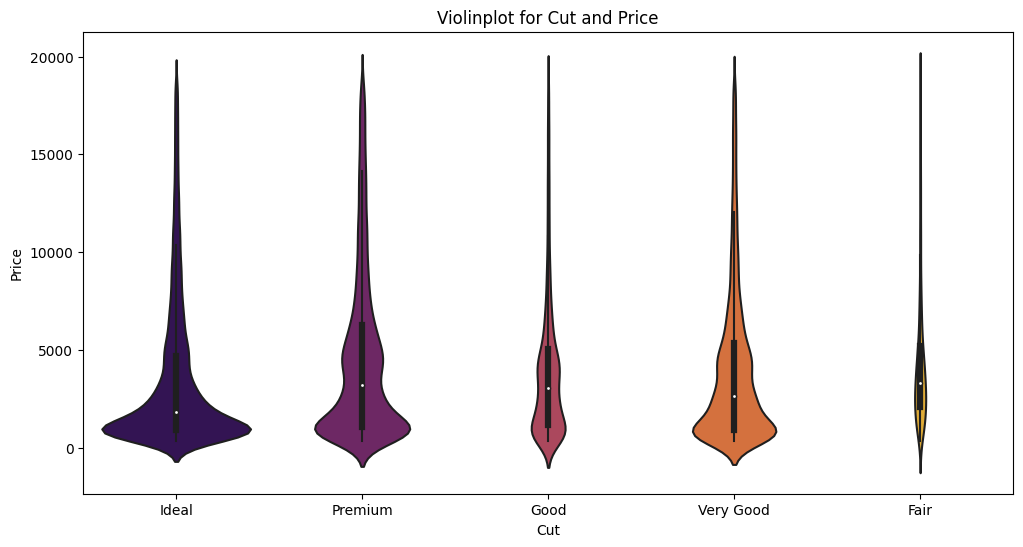

In [17]:
# visualizing the three categorical columns
plt.figure(figsize=(12,6))
ax = sns .violinplot(x="cut", y="price", data = df, palette = 'inferno', scale='count')
ax.set_title("Violinplot for Cut and Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")

Text(0.5, 0, 'Color')

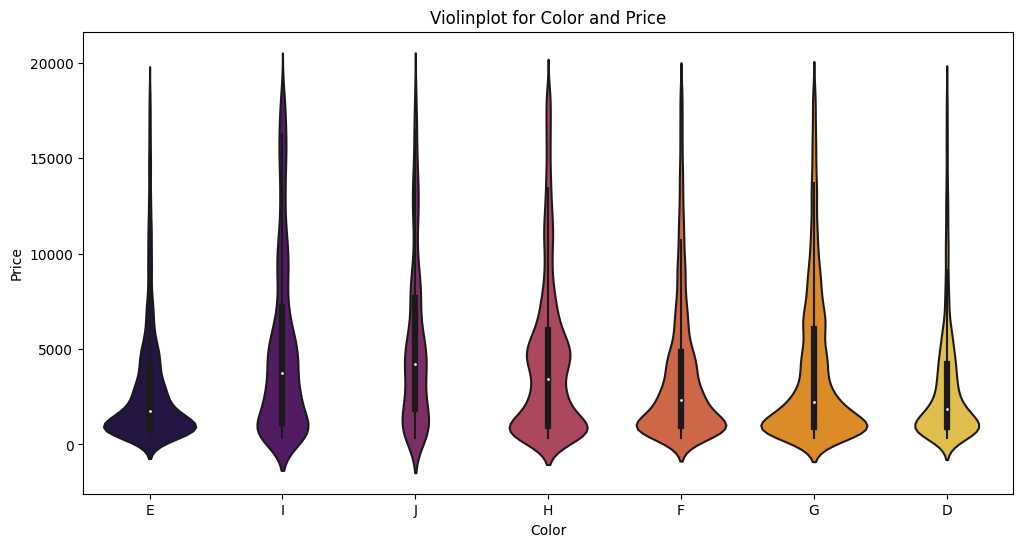

In [18]:
# visualizing the three categorical columns
plt.figure(figsize=(12,6))
ax = sns .violinplot(x="color", y="price", data = df, palette = 'inferno', scale='count')
ax.set_title("Violinplot for Color and Price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")

Text(0.5, 0, 'Clarity')

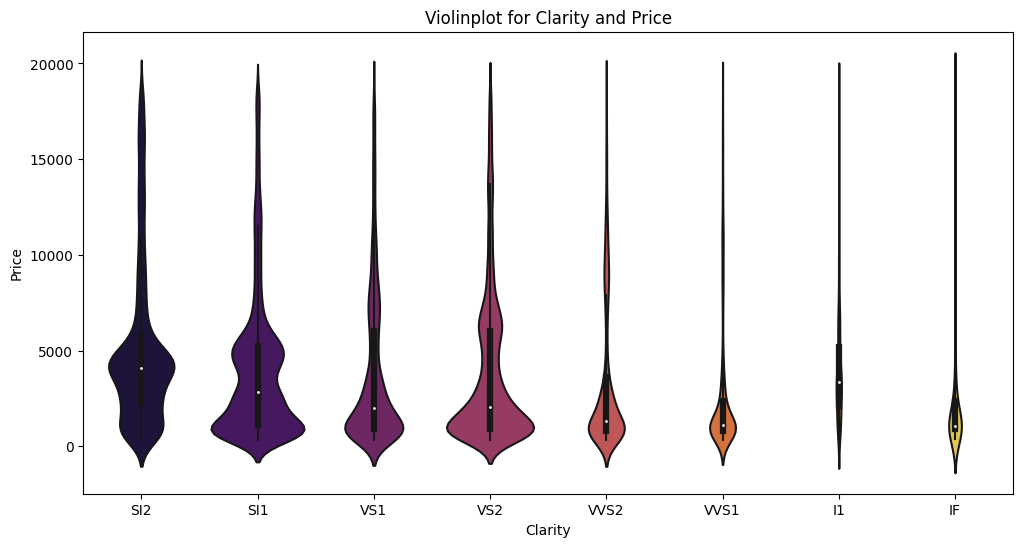

In [19]:
# visualizing the three categorical columns
plt.figure(figsize=(12,6))
ax = sns .violinplot(x="clarity", y="price", data = df, palette = 'inferno', scale='count')
ax.set_title("Violinplot for Clarity and Price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")

# Applying Label Encoder

In [20]:
# making copy of data to avoid the changing in original data
label_data = df.copy()

label_encoder = LabelEncoder()
for col in object_cols:
  label_data[col] = label_encoder.fit_transform(label_data[col])

label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [21]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# Correlation Matrix using Heatmap

<Axes: >

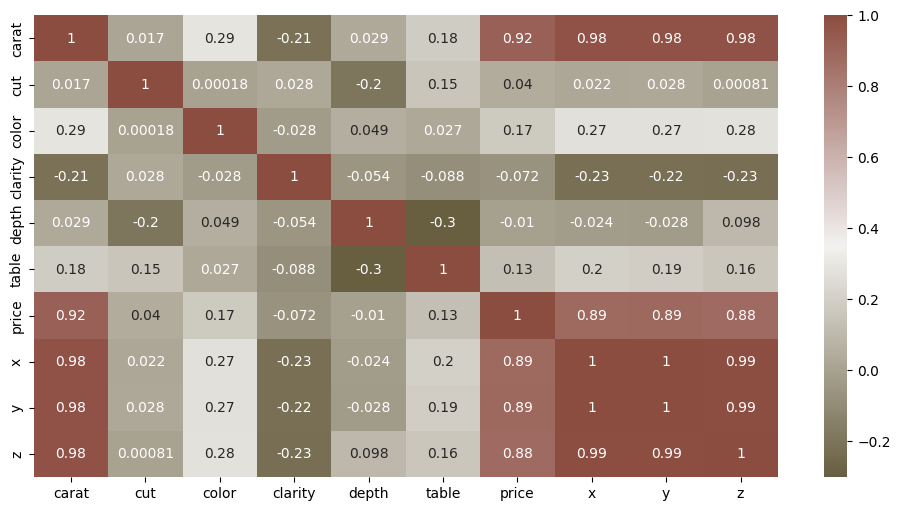

In [22]:
cmap = sns.diverging_palette(70,20, s=50, l=40, as_cmap=True)
corrmat = label_data.corr()

f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corrmat, cmap=cmap, annot=True)

# Model Building

In [23]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [24]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -758.658734 
RandomForest: -547.189303 
KNeighbors: -823.648809 
XGBRegressor: -545.458108 


In [26]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [27]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9810847980166805
Adjusted R^2: 0.9810721569817172
MAE: 278.0934000996743
MSE: 296738.36462685897
RMSE: 544.7369682946614


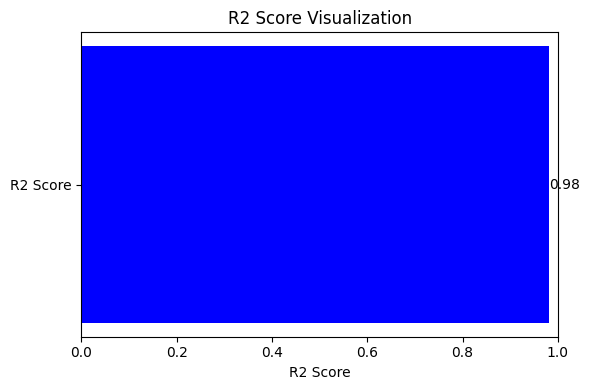

In [28]:
# Calculate R2 score
r2 = metrics.r2_score(y_test, pred)

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.barh(["R2 Score"], [r2], color='blue')
plt.xlim(0, 1)  # Set x-axis limits
plt.xlabel('R2 Score')
plt.title('R2 Score Visualization')

# Display the R2 score on the bars
for index, value in enumerate([r2]):
    plt.text(value, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()
